### 1) Importing Libraries

#### Standard Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


####Downloading Files from Google Drivel

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

import os

    100% |████████████████████████████████| 993kB 21.3MB/s 


In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [4]:
# Downloading Headlines train and Test Data from google drive
# PS: the traing data is public and was downloaded to drive from:
#        https://bitbucket.org/ssix-project/semeval-2017-task-5-subtask-2/raw/46143dc3c0c28b9286b6d1d424d1359c8f49d6cc/Headline_Trainingdata.json
#     while the test data is avaliable n the same repo, but without labels
#     the one used here was requested by e-mail, and contains labels

files_list = {'full_dict.txt': '1_ZBh3oFm3CYDqG3IcVY-ukG0-vsiulTp',
              'train.csv': '1Tjy8fxm63Yg9n7EemvJ_G_Fbs6Y6SQEC',
              'test.csv': '1NAQTM-0ynAQJ8CjHZ1AaxuMIuvuYjrgq',
              'SenVal_Functions.py': '1QgNS3191Q87tdXgyyJLrOqAlQf3wjki4'}

for filename, gdrive_id in files_list.items():
  exists = os.path.isfile('/content/' + filename)
  
  if not exists:
    drive.CreateFile({'id': gdrive_id}).GetContentFile(filename)
    print('File {} was downloaded.'.format(filename))
  else:
    print('File {} not downloaded because already on system.'.format(filename))

File full_dict.txt was downloaded.
File train.csv was downloaded.
File test.csv was downloaded.
File SenVal_Functions.py was downloaded.


#### SenVal Evaluation Metric

In [5]:
from SenVal_Functions import SenVal_metric
from sklearn.metrics import make_scorer

#New scoring function
scoring_SenVal = make_scorer(SenVal_metric)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


####  NLP

In [0]:
from SenVal_Functions import NLP_pre_processing

#### Dictionaries

In [0]:
#Dictionary with all the words in the corpus and only these
with open("full_dict.txt", "rb") as fp:   # Unpickling
    full_dict = pickle.load(fp)

In [0]:
# Download dictionary WORDS from nltk
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     /Users/angelfelipemagnossaodepaula/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### 2) Load files

In [0]:
#test
df_test = pd.read_csv('test.csv', index_col='id')
#train
df_train = pd.read_csv('train.csv', index_col='id')

### 3) Split dataset in " Title " and " Label "

In [0]:
#Train_Title
train_title = []
for n in df_train['title']:
    train_title.append(n)
    
#Train_Label
train_label = df_train['sentiment_range'].values 

In [0]:
#Test_Title
test_title = []
for n in df_test['title']:
    test_title.append(n)
      
#Test_Label
test_label = df_test['sentiment_range'].values

### 4) Text Preprocessing

In [0]:
# Applying the NLP_pre_processing function 

#Train
documents_train = NLP_pre_processing(train_title)
#Test
documents_test = NLP_pre_processing(test_title)

### 5) Converting Text to Numbers 

#### Dictionary Preparation

In [0]:
# Import dictionary WORDS from nltk
from nltk.corpus import words

In [0]:
# Convert dictionary to set and add it into" vocab "
vocab = set(words.words())

#### Bag of Words

In [0]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#Train
vectorizer_train = CountVectorizer(max_features=1500, vocabulary= full_dict, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
train_title = vectorizer_train.fit_transform(documents_train).toarray()

In [0]:
#Test
vectorizer_test = CountVectorizer(max_features=1500, vocabulary= full_dict, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
test_title = vectorizer_test.fit_transform(documents_test).toarray()

#### Finding TFIDF

In [0]:
# Import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
#Train
tfidfconverter_train = TfidfTransformer()
train_title = tfidfconverter_train.fit_transform(train_title).toarray()

In [0]:
#Test
tfidfconverter_test = TfidfTransformer()
test_title = tfidfconverter_test.fit_transform(test_title).toarray()

### 6) Training and Testing Sets

In [0]:
# Import train_test_split
from sklearn.model_selection import train_test_split  

In [0]:
#Train and Validation
X_train, X_validation, y_train, y_validation = train_test_split(train_title, train_label, test_size=0.20, random_state=0) 

In [0]:
#Test
X_test = test_title
y_test = test_label

### 7) Grid Search for Parameter Selection

#### Random Forest algorithm 

In [0]:
# Import Import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Set the classifier_1
classifier_1 = RandomForestRegressor(random_state=0) 

#### Grid Search

In [0]:
# Import the Grid Search algorithm (with Stratified KFold)
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import neg_mean_squared_error

In [0]:
#Gred Search parameters
n_estimators_range = np.arange(100,2000,100)

In [0]:
#Create a dictionary of parameters and their corresponding values for Random Forest algorithm

#For small train
grid_param = {
    'n_estimators':[5],
    'criterion':['mse','mae']
}

# Apply in the real train !!!
#grid_param = {
#    'n_estimators':n_estimators_range,
#    'criterion':['mse','mae'],
#    'bootstrap':[True, False],
#    'warm_start':[True, False],
#    'max_features':['sqrt','log2',None]

#}



In [0]:
#Create an instance of the GridSearchCV class 

#For small train
gd_sr = GridSearchCV(estimator=classifier_1,  
                     param_grid=grid_param,
                     scoring= 'neg_mean_squared_error',
                     cv=2,
                     n_jobs=-1)

# Apply in the real train !!!
#gd_sr = GridSearchCV(estimator=classifier_1,  
#                     param_grid=grid_param,
#                     scoring='neg_mean_squared_error',
#                     cv=10,
#                     n_jobs=-1)



In [0]:
#Fit method of the class and pass it the training and test set
gd_sr.fit(X_train, y_train) 

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [5], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

#### Check the parameters that return the lowest Mean squared errer MSE

In [0]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'mse', 'n_estimators': 5}


#### Find the Mean squared errer (MSE) obtained using the best parameters.

In [0]:
best_result = -gd_sr.best_score_
print(best_result)

0.14229579332468056


### 8) Validation

In [0]:
# Set the classifier_2
classifier_2 = RandomForestRegressor(bootstrap = True, criterion = 'mse', max_features = 'log2', warm_start = True, random_state = 0)

In [0]:
#Create a dictionary of parameters and their corresponding values for Random Forest algorithm

# Apply in the real Validation !!!
#grid_param = {
#    'n_estimators':[100, 200, 300, 400, 500, 700, 1000, 1500, 2000, 5000]
#}


grid_param = {
    'n_estimators':[2,5]
}

In [0]:
#Create an instance of the GridSearchCV class 

# Apply in the real validation !!!
#gd_sr = GridSearchCV(estimator=classifier_2,  
#                     param_grid=grid_param,
#                     scoring='neg_mean_squared_error',
#                     cv=10,
#                     n_jobs=-1)

gd_sr = GridSearchCV(estimator=classifier_2,  
                     param_grid=grid_param,
                     scoring= 'neg_mean_squared_error',
                     cv=2,
                     n_jobs=-1)



In [0]:
#Fit method of the class and pass it the training and test set
gd_sr.fit(X_validation, y_validation)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [2, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

####  Check the parameters that return the lowest Mean squared errer MSE

In [0]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 5}


#### Find the Mean squared errer (MSE) obtained using the best parameters.

In [0]:
best_result = -gd_sr.best_score_
print(best_result)

0.16603700355652595


### 9) Predicting Sentiment

#### Bag of Words (change the dictionary)

In [0]:
#Train
vectorizer_train = CountVectorizer(max_features=1500, vocabulary= vocab, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
train_title = vectorizer_train.fit_transform(documents_train).toarray()

In [0]:
#Test
vectorizer_test = CountVectorizer(max_features=1500, vocabulary= vocab, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
test_title = vectorizer_test.fit_transform(documents_test).toarray()

#### Finding TFIDF

In [0]:
#Train
tfidfconverter_train = TfidfTransformer()
train_title = tfidfconverter_train.fit_transform(train_title).toarray()

In [0]:
#Test
tfidfconverter_test = TfidfTransformer()
test_title = tfidfconverter_test.fit_transform(test_title).toarray()

#### Training Using the full " train dataset " 

In [0]:
#Test
#X_train_full, X, y_train_full, y = train_test_split(train_title, train_label, test_size=0, shuffle=False)
X_train_full = train_title
y_train_full = train_label

In [0]:
# Set the classifier_3
classifier_3 = RandomForestRegressor(n_estimators = 300, bootstrap = True, criterion = 'mse', max_features = 'log2', warm_start = True, random_state = 0)
classifier_3.fit(X_train_full, y_train_full)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=True)

#### Prediction

In [0]:
y_pred = classifier_3.predict(X_test)

### 10) Evaluating the Model

#### Ordinary metrics

In [0]:
# Import Import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))  
print('Mean Squred Error:', mean_squared_error(y_test,y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.2547702297350383
Mean Squred Error: 0.11209625558290597
Root Mean Squared Error: 0.3348077890117044


#### SanVal metric

In [0]:
#Reshape matrix
#Predict
y_pred=y_pred.reshape(1,-1)
#Label
y_test=y_test.reshape(1,-1)

In [0]:
SenVal_metric(y_test, y_pred)

array([[0.60435591]])

### Graphics

#### Validatio Curve

In [0]:
#Import Validation Curve
from SenVal_Functions import plot_validation_curve

In [0]:
#Set parameters range
estimator = RandomForestRegressor()
title = "Validation Curve With Regression Random Forest"
x_label = r"Number Of Trees"
param_name='n_estimators'
ylim = (0.0, 0.5)
n_estimators_range = np.arange(100,1500,250)
cv=2
n_jobs=-1

In [0]:
#Apply Validation Curve
plot_validation_curve(estimator, title, x_label, X_train_full, y_train_full, param_name, degree_range, ylim, cv, n_jobs)

#### Learning Curve

In [0]:
# Import curve/plot
from SenVal_Functions import plot_learning_curve

In [0]:
# Set the of learn curve plot
estimator = RandomForestRegressor()
title = r"Learning Curves (Regression Random Forest , n_trees = X)"
ylim=(0, 0.2)
cv=10
n_jobs=-1

<module 'matplotlib.pyplot' from '/Users/angelfelipemagnossaodepaula/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

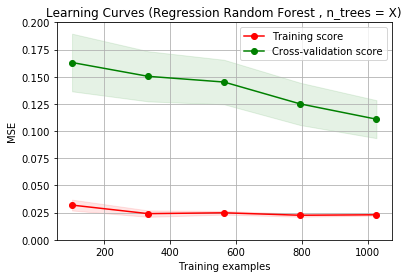

In [0]:
#Apply learning Curve
plot_learning_curve(estimator, title, X_train_full, y_train_full, ylim, cv, n_jobs)

### 11) Saving and Loading the Model

In [0]:
with open('RandomForest_Regrassion_3', 'wb') as picklefile:
    pickle.dump(classifier_3,picklefile)

In [0]:
#Load Model
#with open('text_classifier', 'rb') as training_model:  
    #model = pickle.load(training_model)